<h1>Prebuilt Datasets and Transforms</h1>


In [1]:
# These are the libraries will be used for this lab.
!pip install torchvision==0.9.1 torch==1.8.1
import torch
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.9.1 (from versions: 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1)
ERROR: No matching distribution found for torchvision==0.9.1


This is the function for displaying images.


In [2]:
# This is the function for displaying images
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

<!--Empty Space for separating topics-->


<a name="Prebuilt_Dataset"><h2 id="Prebuilt_Dataset">Prebuilt Datasets</h2></a>


In [3]:
# Run the command below when you do not have torchvision installed
# !mamba install -y torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [5]:
# Import the prebuilt dataset into variable dataset
dataset = dsets.MNIST(
    root = './data',
    download = True,
    transform = transforms.ToTensor()
)

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9.91M/9.91M [00:00<00:00, 142MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 42.4MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:00<00:00, 81.1MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.37MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Each element of the dataset object contains a tuple. Let us see whether the first element in the dataset is a tuple and what is in it.


In [6]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?
print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  5
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


Let us plot the first element in the dataset:


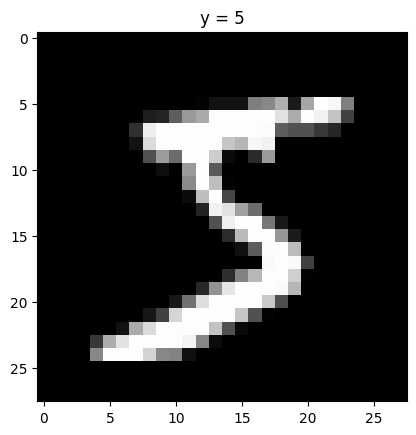

In [7]:
# Plot the first element in the dataset
show_data(dataset[0])

Plot the second sample:   


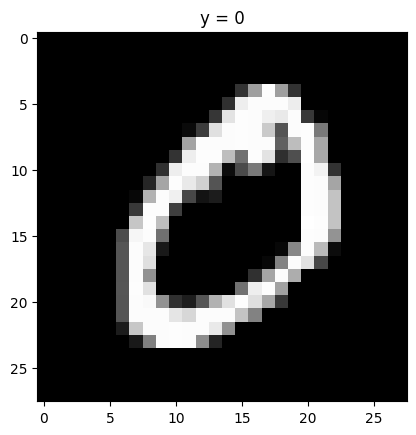

In [8]:
# Plot the second element in the dataset
show_data(dataset[1])

<a name="Torchvision"><h2 id="Torchvision"> Torchvision Transforms  </h2></a>


We can apply some image transform functions on the MNIST dataset.


As an example, the images in the MNIST dataset can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.


In [9]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20 instead of 28 x 28.


Let us plot the first image again. Notice that the black space around the <b>7</b> become less apparent.


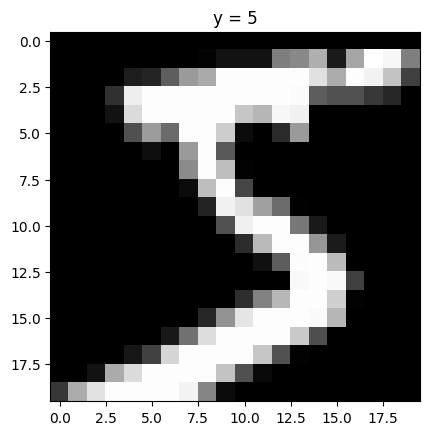

In [10]:
# Plot the first element in the dataset
show_data(dataset[0],shape = (20, 20))

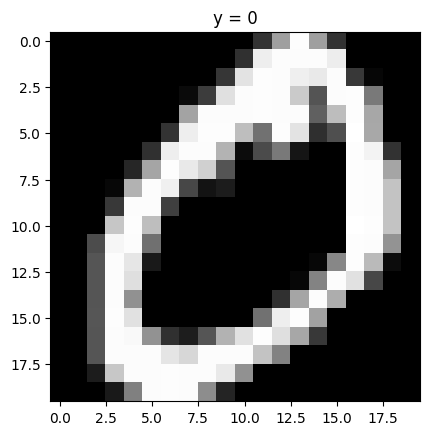

In [11]:
# Plot the second element in the dataset
show_data(dataset[1],shape = (20, 20))

In the below example, we horizontally flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


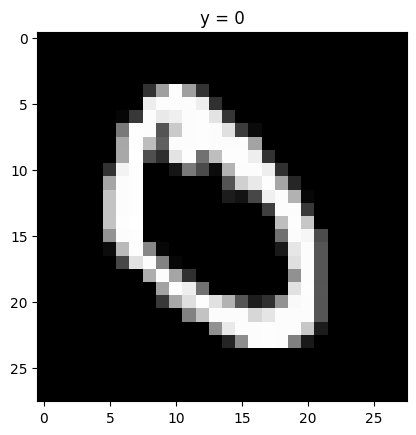

In [12]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.
fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

<h3>Practice</h3>


Try to use the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image (the image as <b>2</b>).


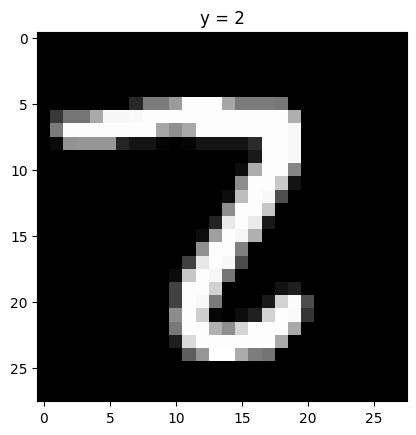

In [13]:
# Practice: Combine vertical flip, horizontal flip and convert to tensor as a compose. Apply the compose on image. Then plot the image
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = my_data_transform)
show_data(dataset[1])